In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from  sklearn.preprocessing import LabelEncoder
from  sklearn.preprocessing import OneHotEncoder
import scipy 
from scipy.sparse import coo_matrix, hstack

from __future__ import division

In [2]:
df_train = pd.read_csv("../data/features_train.csv")
df_test = pd.read_csv("../data/features_test.csv")

In [60]:
df_labels = pd.read_csv("../data/labels_train.csv" , header = None )

In [63]:
labels_train = df_labels[1].values

In [30]:
df_train = df_train.drop( ["SK_ID_CURR"] , axis = 1 ) 
test_ids = df_test["SK_ID_CURR"]
df_test = df_test.drop( ["SK_ID_CURR"] , axis = 1 ) 

test_ids.to_csv("../data/ids_test.csv")

In [31]:
df_test.shape

(48744, 307)

In [32]:
features_train_num = df_train.select_dtypes(include=[np.number])
features_test_num = df_test.select_dtypes(include=[np.number])

In [36]:
features_train_cat =df_train.select_dtypes(include=[object])
features_test_cat = df_test.select_dtypes(include=[object])

In [38]:
features_test_cat.shape

(48744, 37)

In [115]:
cats_not_doc = [ x for x in df_train.columns if not x.startswith("FLAG_DOCUMENT")]

In [116]:
cats_not_doc

['LIVINGAPARTMENTS_MODE',
 'REGION_RATING_CLIENT',
 'EXT_SOURCE_1',
 'APARTMENTS_MODE',
 'NAME_INCOME_TYPE',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'ELEVATORS_AVG',
 'ENTRANCES_MEDI',
 'EMERGENCYSTATE_MODE',
 'APARTMENTS_AVG',
 'FLAG_WORK_PHONE',
 'YEARS_BUILD_MEDI',
 'FLAG_EMP_PHONE',
 'OWN_CAR_AGE',
 'FLOORSMAX_MODE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'DAYS_EMPLOYED',
 'NONLIVINGAREA_AVG',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'BASEMENTAREA_MEDI',
 'AMT_CREDIT',
 'ELEVATORS_MODE',
 'FLOORSMAX_AVG',
 'DAYS_REGISTRATION',
 'COMMONAREA_MEDI',
 'HOUR_APPR_PROCESS_START',
 'LIVINGAREA_MEDI',
 'REGION_POPULATION_RELATIVE',
 'LANDAREA_AVG',
 'EXT_SOURCE_2',
 'BASEMENTAREA_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAREA_MODE',
 'FLAG_OWN_CAR',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'COMMONAREA_AVG',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE',
 'CN

In [41]:
for col in features_train_cat.columns:
    
    df_ = pd.concat( [features_train_cat[col] , features_test_cat[col] ]   )
    
    enc = LabelEncoder()
    enc.fit( df_.values ) 
    features_train_cat[col] = enc.transform( features_train_cat[col] )
    features_test_cat[col] = enc.transform( features_test_cat[col] )
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
features_test_cat.head()

,NAME_INCOME_TYPE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,NAME_TYPE_SUITE,FONDKAPREMONT_MODE,FLAG_OWN_CAR,WEEKDAY_APPR_PROCESS_START,CODE_GENDER,FLAG_OWN_REALTY,NAME_FAMILY_STATUS,...,LAST(bureau.CREDIT_CURRENCY),LAST(prev.NAME_SELLER_INDUSTRY),LAST(bureau.CREDIT_ACTIVE),LAST(prev.NAME_TYPE_SUITE),LAST(card.NAME_CONTRACT_STATUS),LAST(bureau.CREDIT_TYPE),LAST(prev.NAME_PAYMENT_TYPE),LAST(prev.CHANNEL_TYPE),LAST(prev.PRODUCT_COMBINATION),LAST(prev.NAME_CONTRACT_TYPE)
0,7,1,0,7,0,0,5,0,1,1,...,1,3,1,2,0,4,1,5,14,2
1,7,0,10,7,0,0,0,1,1,1,...,1,3,1,0,0,4,1,5,14,2
2,7,0,5,0,0,1,1,1,1,1,...,1,3,3,7,1,2,1,8,14,2
3,7,1,15,7,3,0,6,0,1,1,...,1,5,3,6,1,5,1,5,11,2
4,7,0,0,7,0,1,0,1,0,1,...,0,3,0,0,0,0,4,5,14,2


In [44]:
features_test_cat.shape

(48744, 37)

In [46]:
features_train_cat = features_train_cat[cats_not_doc]
features_test_cat = features_test_cat[cats_not_doc]

In [47]:
df_ = pd.concat( [features_train_cat , features_test_cat ] , axis = 0 )
enc = OneHotEncoder()
enc.fit( df_ )
onehot_train = enc.transform( features_train_cat )
onehot_test = enc.transform( features_test_cat )

In [48]:
features_test_cat.shape

(48744, 37)

In [49]:
onehot_test.shape

(48744, 343)

In [50]:
features_train_num.shape

(307511, 270)

In [112]:
features_train_num2 = (features_train_num - features_train_num.mean()) / features_train_num.std()

In [121]:
features_test_num2  = (features_test_num - features_test_num.mean()) / features_test_num.std()

In [122]:
feats_not_flag =  [ x for x in features_train_num.columns if not x.startswith("FLAG_DOCUMENT")]
features_train_num2 = features_train_num2[ feats_not_flag]
features_test_num2 = features_test_num2[ feats_not_flag ]

In [123]:
features_train_num2.head()

,LIVINGAPARTMENTS_MODE,REGION_RATING_CLIENT,EXT_SOURCE_1,APARTMENTS_MODE,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,ELEVATORS_AVG,...,MEAN(prev.CNT_PAYMENT),LAST(pos.SK_ID_PREV),MAX(card.AMT_RECIVABLE),LAST(prev.AMT_CREDIT),LAST(card.AMT_PAYMENT_CURRENT),MEAN(prev.DAYS_LAST_DUE_1ST_VERSION),MAX(card.CNT_DRAWINGS_OTHER_CURRENT),MEAN(bureau.AMT_CREDIT_SUM_DEBT),LAST(card.AMT_PAYMENT_TOTAL_CURRENT),MAX(prev.RATE_INTEREST_PRIVILEGED)
0,-0.154903,-0.103064,-0.476522,-0.327406,-0.291207,-0.467813,1.599334,-0.547235,0.579153,-0.368512,...,1.162781,-1.096080,-0.362627,0.067179,-0.134136,-0.478063,-0.119702,-0.174326,-0.126542,-0.122311
1,0.617488,-2.067570,0.323238,0.380976,-0.291207,-0.467813,1.599334,-0.547235,1.790852,0.431105,...,-0.422888,1.233806,-0.362627,0.693380,-0.134136,-0.496924,-0.119702,-0.275814,-0.126542,-0.122311
2,-0.453019,-0.103064,-0.767498,-0.593050,-0.291207,-0.467813,1.599334,-0.547235,0.306868,-0.368512,...,-1.102460,-0.330037,-0.362627,-0.519757,-0.134136,-0.491741,-0.119702,-0.275814,-0.126542,-0.122311
3,-0.453019,-0.103064,-0.767498,-0.593050,-0.291207,-0.467813,-0.625258,-0.547235,0.369143,-0.368512,...,1.049519,0.583624,-0.362627,-0.594001,-0.134136,1.049451,-0.119702,-0.275814,-0.126542,-0.122311
4,-0.453019,-0.103064,-0.767498,-0.593050,-0.291207,2.137598,-0.625258,1.827364,-0.307263,-0.368512,...,0.785241,0.219427,-0.362627,0.456176,-0.134136,-0.494133,-0.119702,-0.275814,-0.126542,-0.122311


In [135]:
features_test_num2.head()

,LIVINGAPARTMENTS_MODE,REGION_RATING_CLIENT,EXT_SOURCE_1,APARTMENTS_MODE,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,ELEVATORS_AVG,...,MEAN(prev.CNT_PAYMENT),LAST(pos.SK_ID_PREV),MAX(card.AMT_RECIVABLE),LAST(prev.AMT_CREDIT),LAST(card.AMT_PAYMENT_CURRENT),MEAN(prev.DAYS_LAST_DUE_1ST_VERSION),MAX(card.CNT_DRAWINGS_OTHER_CURRENT),MEAN(bureau.AMT_CREDIT_SUM_DEBT),LAST(card.AMT_PAYMENT_TOTAL_CURRENT),MAX(prev.RATE_INTEREST_PRIVILEGED)
0,-0.459375,-0.073004,1.580989,0.064413,-0.289774,-0.459311,-0.597565,-0.538291,1.427226,-0.389416,...,-0.734095,-0.837209,-0.393048,-0.531494,-0.146248,-0.579258,-0.113762,-0.105626,-0.137740,-0.151517
1,-0.459375,-0.073004,0.939681,-0.603966,-0.289774,-0.459311,-0.597565,-0.538291,0.910428,-0.389416,...,-0.264157,1.068831,-0.393048,-0.470828,-0.146248,-0.559672,-0.113762,0.083301,-0.137740,-0.151517
2,-0.459375,-0.073004,-0.991480,-0.603966,-0.289774,-0.459311,-0.597565,-0.538291,-0.287576,-0.389416,...,0.362428,0.002584,1.037723,-0.441988,-0.134774,-0.562108,-0.113762,-0.260136,-0.137740,-0.151517
3,2.862711,-0.073004,0.805502,2.488281,-0.289774,-0.459311,1.673424,-0.538291,-0.736828,2.638363,...,-0.342480,1.634306,-0.065267,-0.134955,0.409007,1.561067,-0.113762,-0.226366,0.426135,-0.151517
4,-0.459375,-0.073004,-0.300539,-0.603966,-0.289774,2.177130,-0.597565,1.857695,-0.771239,-0.389416,...,1.145658,0.784876,-0.393048,-0.276403,-0.146248,-0.561085,-0.113762,-0.260136,-0.137740,-0.151517


In [152]:
s = features_train_num2.shape[0]
for col in features_train_num2.columns:
    #plt.hist( features_train_num2[col].values )
    print( col )
    zeros = np.count_nonzero( features_train_num2[col].values )
    print( "Ratios nonzeros/total" , zeros )
    #plt.title( fn )
    #plt.show()

LIVINGAPARTMENTS_MODE
('Ratios nonzeros/total', 307511)
REGION_RATING_CLIENT
('Ratios nonzeros/total', 307511)
EXT_SOURCE_1
('Ratios nonzeros/total', 307511)
APARTMENTS_MODE
('Ratios nonzeros/total', 307511)
REG_CITY_NOT_LIVE_CITY
('Ratios nonzeros/total', 307511)
LIVE_CITY_NOT_WORK_CITY
('Ratios nonzeros/total', 307511)
FLAG_PHONE
('Ratios nonzeros/total', 307511)
REG_CITY_NOT_WORK_CITY
('Ratios nonzeros/total', 307511)
DAYS_ID_PUBLISH
('Ratios nonzeros/total', 307511)
ELEVATORS_AVG
('Ratios nonzeros/total', 307511)
ENTRANCES_MEDI
('Ratios nonzeros/total', 307511)
APARTMENTS_AVG
('Ratios nonzeros/total', 307511)
FLAG_WORK_PHONE
('Ratios nonzeros/total', 307511)
YEARS_BUILD_MEDI
('Ratios nonzeros/total', 307511)
FLAG_EMP_PHONE
('Ratios nonzeros/total', 307511)
OWN_CAR_AGE
('Ratios nonzeros/total', 307511)
FLOORSMAX_MODE
('Ratios nonzeros/total', 307511)
DAYS_EMPLOYED
('Ratios nonzeros/total', 307511)
NONLIVINGAREA_AVG
('Ratios nonzeros/total', 307511)
AMT_REQ_CREDIT_BUREAU_QRT
('Ratios

('Ratios nonzeros/total', 307511)
MAX(prev.DAYS_LAST_DUE)
('Ratios nonzeros/total', 307511)
MEAN(prev.RATE_INTEREST_PRIVILEGED)
('Ratios nonzeros/total', 307511)
LAST(prev.RATE_INTEREST_PRIMARY)
('Ratios nonzeros/total', 307511)
MEAN(card.MONTHS_BALANCE)
('Ratios nonzeros/total', 307511)
MAX(pos.SK_DPD)
('Ratios nonzeros/total', 307511)
MAX(prev.DAYS_FIRST_DRAWING)
('Ratios nonzeros/total', 307511)
MEAN(prev.DAYS_LAST_DUE)
('Ratios nonzeros/total', 307511)
MAX(bureau.DAYS_CREDIT_UPDATE)
('Ratios nonzeros/total', 307511)
LAST(bureau.DAYS_ENDDATE_FACT)
('Ratios nonzeros/total', 307511)
LAST(card.AMT_CREDIT_LIMIT_ACTUAL)
('Ratios nonzeros/total', 307511)
MEAN(bureau.AMT_CREDIT_MAX_OVERDUE)
('Ratios nonzeros/total', 307511)
LAST(prev.NFLAG_INSURED_ON_APPROVAL)
('Ratios nonzeros/total', 307511)
LAST(bureau.AMT_CREDIT_SUM_LIMIT)
('Ratios nonzeros/total', 307511)
MEAN(card.AMT_RECEIVABLE_PRINCIPAL)
('Ratios nonzeros/total', 307511)
MEAN(prev.AMT_CREDIT)
('Ratios nonzeros/total', 307511)
LAST(

In [125]:
features_train_num_sp = scipy.sparse.csr_matrix(features_train_num2.values)
features_test_num_sp = scipy.sparse.csr_matrix(features_test_num2.values)


In [126]:
features_train_t = hstack( [ onehot_train , features_train_num_sp ]   )
features_test_t = hstack( [ onehot_test , features_test_num_sp ]   )

In [156]:
pd.DataFrame( features_train_t.todense() ).to_csv("../data/sparse/train.csv" , index = False )

In [157]:
pd.DataFrame( features_test_t.todense() ).to_csv("../data/sparse/test.csv" , index = False )

In [138]:
scipy.sparse.save_npz("../data/features_train_onehot.bin", features_train_t , compressed=True)
scipy.sparse.save_npz("../data/features_test_onehot.bin", features_test_t , compressed=True)

In [127]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [128]:
x_train , x_val , y_train , y_val = train_test_split( features_train_t , labels_train , test_size = 0.3 , random_state=42)

In [81]:
x_train.shape

(215257, 613)

(10, 613)

In [74]:
#y_val.sum()/y_val.shape[0]

0.0803542393825742

In [129]:
#lgb_train = lgb.Dataset( x_train , y_train)
#lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
y_train.shape

learning_rate = 0.1
num_leaves = 15
min_data_in_leaf = 2000
feature_fraction = 0.9
num_boost_round = 10000
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "metric":["auc" ,"binary_logloss"] , 
          "num_leaves": num_leaves,
           "max_bin": 256,
          "feature_fraction": feature_fraction,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": True,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9
}


In [130]:
NFOLDS = 5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=218)
X = features_train_t.toarray()
print( X.shape )
X_test = features_test_t.toarray()
final_cv_train = np.zeros(len(labels_train))
final_cv_pred = np.zeros(len( test_ids ))
x_score = []
for s in xrange(16):
    cv_train = np.zeros(len(labels_train))
    cv_pred = np.zeros(len(test_ids))

    params['seed'] = s

    if True:
        kf = kfold.split( X ,   labels_train )

        best_trees = []
        fold_scores = []

        for i, (train_fold, validate) in enumerate(kf):
            X_train, X_validate, label_train, label_validate = X[train_fold, :], X[validate, :], labels_train[train_fold], labels_train[validate]
            dtrain = lgb.Dataset(X_train, label_train)
            dvalid = lgb.Dataset(X_validate, label_validate, reference=dtrain)
            bst = lgb.train(params, dtrain, num_boost_round, valid_sets=dvalid , verbose_eval=100,early_stopping_rounds=100)
            best_trees.append(bst.best_iteration)
            cv_pred += bst.predict(X_test, num_iteration=bst.best_iteration)
            cv_train[validate] += bst.predict(X_validate)
            
            
            score = roc_auc_score( label_validate, cv_train[validate] )
            print( score )
            fold_scores.append(score)

        cv_pred /= NFOLDS
        final_cv_train += cv_train
        final_cv_pred += cv_pred

        print("cv score:")
        print roc_auc_score(labels_train, cv_train)
        print "current score:", roc_auc_score( labels_train , final_cv_train / (s + 1.)), s+1
        print(fold_scores)
        print(best_trees, np.mean(best_trees))

        x_score.append(roc_auc_score( labels_train , cv_train))

(307511, 593)
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.558164	valid_0's auc: 0.771785
[200]	valid_0's binary_logloss: 0.543554	valid_0's auc: 0.775763
[300]	valid_0's binary_logloss: 0.533389	valid_0's auc: 0.775936
Early stopping, best iteration is:
[240]	valid_0's binary_logloss: 0.539273	valid_0's auc: 0.776184
0.7761837621210442
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.56176	valid_0's auc: 0.77349
[200]	valid_0's binary_logloss: 0.546958	valid_0's auc: 0.778541
[300]	valid_0's binary_logloss: 0.53617	valid_0's auc: 0.780058
[400]	valid_0's binary_logloss: 0.526847	valid_0's auc: 0.780554
[500]	valid_0's binary_logloss: 0.518041	valid_0's auc: 0.780847
Early stopping, best iteration is:
[440]	valid_0's binary_logloss: 0.523072	valid_0's auc: 0.78108
0.7810802258539314
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.55992	val

[200]	valid_0's binary_logloss: 0.546605	valid_0's auc: 0.778937
[300]	valid_0's binary_logloss: 0.53608	valid_0's auc: 0.780287
[400]	valid_0's binary_logloss: 0.52665	valid_0's auc: 0.780526
Early stopping, best iteration is:
[349]	valid_0's binary_logloss: 0.531283	valid_0's auc: 0.780662
0.7806624260407782
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.559708	valid_0's auc: 0.773386
[200]	valid_0's binary_logloss: 0.544199	valid_0's auc: 0.778356
[300]	valid_0's binary_logloss: 0.533752	valid_0's auc: 0.779133
[400]	valid_0's binary_logloss: 0.524362	valid_0's auc: 0.779651
Early stopping, best iteration is:
[382]	valid_0's binary_logloss: 0.526034	valid_0's auc: 0.779748
0.7797479895394547
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.562258	valid_0's auc: 0.772487
[200]	valid_0's binary_logloss: 0.548098	valid_0's auc: 0.776006
[300]	valid_0's binary_logloss: 0.537765	valid_0's au

[400]	valid_0's binary_logloss: 0.523917	valid_0's auc: 0.780579
Early stopping, best iteration is:
[397]	valid_0's binary_logloss: 0.524111	valid_0's auc: 0.780649
0.7806486358219263
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.561909	valid_0's auc: 0.773044
[200]	valid_0's binary_logloss: 0.547458	valid_0's auc: 0.777423
[300]	valid_0's binary_logloss: 0.537255	valid_0's auc: 0.777801
[400]	valid_0's binary_logloss: 0.528219	valid_0's auc: 0.777879
[500]	valid_0's binary_logloss: 0.52015	valid_0's auc: 0.778174
[600]	valid_0's binary_logloss: 0.512134	valid_0's auc: 0.778247
[700]	valid_0's binary_logloss: 0.504757	valid_0's auc: 0.777888
Early stopping, best iteration is:
[625]	valid_0's binary_logloss: 0.510187	valid_0's auc: 0.77834
0.7783404930432514
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.5624	valid_0's auc: 0.775014
[200]	valid_0's binary_logloss: 0.547341	valid_0's auc:

[100]	valid_0's binary_logloss: 0.562714	valid_0's auc: 0.774757
[200]	valid_0's binary_logloss: 0.547762	valid_0's auc: 0.779359
[300]	valid_0's binary_logloss: 0.537677	valid_0's auc: 0.78033
[400]	valid_0's binary_logloss: 0.528264	valid_0's auc: 0.780593
Early stopping, best iteration is:
[365]	valid_0's binary_logloss: 0.53145	valid_0's auc: 0.78072
0.7807198383804875
cv score:
0.7793435698075687
current score: 0.7817353665437535 10
[0.7785633147409132, 0.7812016410538556, 0.7803266978013543, 0.7760712022735657, 0.7807198383804875]
([398, 345, 305, 305, 365], 343.6)
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.558028	valid_0's auc: 0.77228
[200]	valid_0's binary_logloss: 0.543182	valid_0's auc: 0.776895
[300]	valid_0's binary_logloss: 0.532704	valid_0's auc: 0.777512
[400]	valid_0's binary_logloss: 0.523637	valid_0's auc: 0.777809
[500]	valid_0's binary_logloss: 0.514818	valid_0's auc: 0.777893
Early stopping, best iteration is:


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.557785	valid_0's auc: 0.77243
[200]	valid_0's binary_logloss: 0.543002	valid_0's auc: 0.776413
[300]	valid_0's binary_logloss: 0.532818	valid_0's auc: 0.776917
Early stopping, best iteration is:
[239]	valid_0's binary_logloss: 0.53876	valid_0's auc: 0.777126
0.7771263110050093
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.561501	valid_0's auc: 0.774867
[200]	valid_0's binary_logloss: 0.546403	valid_0's auc: 0.779822
[300]	valid_0's binary_logloss: 0.535754	valid_0's auc: 0.781069
[400]	valid_0's binary_logloss: 0.526641	valid_0's auc: 0.781115
[500]	valid_0's binary_logloss: 0.517703	valid_0's auc: 0.780801
Early stopping, best iteration is:
[438]	valid_0's binary_logloss: 0.522875	valid_0's auc: 0.781509
0.781509293675927
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.559955	valid_0's auc: 

In [131]:
print( x_score )

[0.7790335461223192, 0.7790881878276594, 0.778920626467156, 0.7790946539247632, 0.7792004753650813, 0.7790415682892464, 0.7793787468178854, 0.7796082132528714, 0.779195239589118, 0.7793435698075687, 0.7792256352471589, 0.7793355138687965, 0.7789828713975478, 0.7793720729598106, 0.7789724683867921, 0.7792699463303395]


In [132]:
preds = final_cv_pred / 16.0

In [133]:
preds

array([0.50498684, 0.70063848, 0.26735573, ..., 0.21231723, 0.26419191,
       0.77671016])

In [134]:
pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': preds }).to_csv('../data/lgbm3_pred_avg2.csv', index=False)

In [139]:

best_trees

[247, 341, 449, 402, 420]

In [140]:
x_train , x_val , y_train , y_val = train_test_split( features_train_t , labels_train , test_size = 0.3 , random_state=42)

In [141]:
dtrain = lgb.Dataset( x_train, y_train)
dvalid = lgb.Dataset( x_val , y_val, reference=dtrain)
bst = lgb.train(params, dtrain, num_boost_round, valid_sets=dvalid , verbose_eval=100,early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.560429	valid_0's auc: 0.772108
[200]	valid_0's binary_logloss: 0.544511	valid_0's auc: 0.776303
[300]	valid_0's binary_logloss: 0.533093	valid_0's auc: 0.77698
[400]	valid_0's binary_logloss: 0.522458	valid_0's auc: 0.777467
[500]	valid_0's binary_logloss: 0.513355	valid_0's auc: 0.777067
Early stopping, best iteration is:
[403]	valid_0's binary_logloss: 0.522161	valid_0's auc: 0.777499


Plot feature importances...


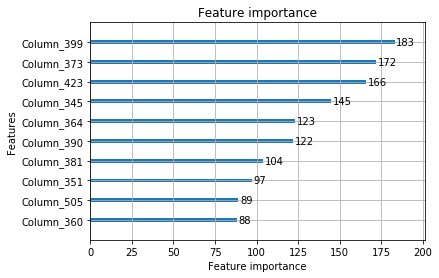

In [147]:
print('Plot feature importances...')
ax = lgb.plot_importance( bst , max_num_features=10)
plt.show()